In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [15]:
BATCH_SIZE = 32
IMAGE_SIZE =256
CHANNELS = 3
EPOCHS =50

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [19]:
class_name = dataset.class_names
class_name

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(32, 256, 256, 3)
[12  7  8 12  5  6 12  9  7 11  5  1 14  2 14  3  3  5 12 14 14  7 14  0
 12  7 11 10  5  7 12 14]


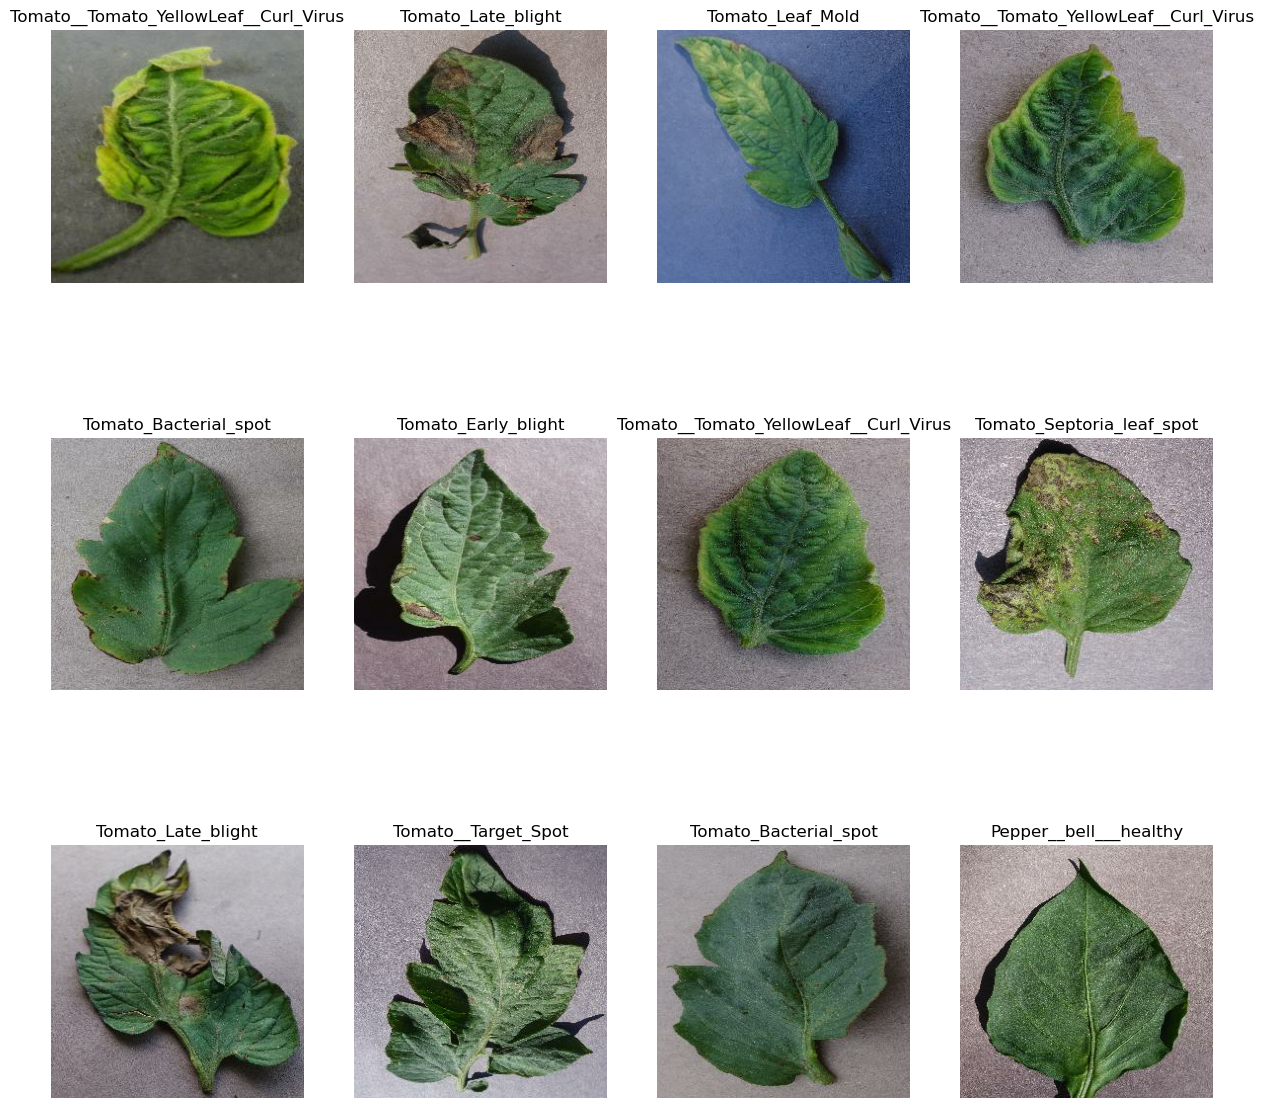

In [27]:
plt.figure(figsize =(15,15))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")

In [54]:
train_size = 0.8
len(dataset)*train_size

516.0

In [58]:
train_ds = dataset.take(516)
len(train_ds)

516

In [60]:
test_ds = dataset.skip(516)
len(test_ds)

129

In [64]:
val_size=0.1
len(dataset)*val_size

64.5

In [66]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [70]:
test_ds = test_ds.skip(64)
len(test_ds)

65

In [72]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+test_split+val_split) == 1

    ds_size =len (ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [74]:
 train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [76]:
len(test_ds)

65

In [78]:
len(train_ds)

516

In [80]:
len(val_ds)

64

In [82]:
516*32

16512

In [90]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [106]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [110]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizantal_and_vertical"),
    layers.RandomRotation(1.0/255)
])